The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011) when the power plant was set to work with a full load.

A combined-cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is collected from and has an effect on the Steam Turbine, the other three of the ambient variables affect the GT performance.

Features consist of hourly average ambient variables
– Temperature (T) in the range 1.81°C and 37.11°C.

– Ambient Pressure (AP) in the range 992.89-1033.30 millibar.


– Relative Humidity (RH) in the range 25.56% to 100.16%.

– Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg.

– Net hourly electrical energy output (PE) 420.26-495.76 MW.

predict Net hourly electrical energy output (PE)

and Exhaust Vacuum (V)

In [1]:
##import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Deeplearning/code/Folds5x2_pp.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
##define a function to get the outputs of the model

def get_outputs(data):
  y1 = data.pop('PE')
  y1 = np.array(y1)   # tensorflow needs data in the form of arrays
  y2 = data.pop('V')
  y2 = np.array(y2)
  return y1, y2

In [5]:
# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(df, test_size=0.2, random_state = 1)


In [7]:
train

,AT,V,AP,RH,PE
9061,6.61,38.91,1015.77,92.31,484.32
6937,22.72,65.61,1014.64,70.53,449.04
5631,10.06,39.61,1018.22,70.22,471.86
6218,27.53,67.83,1009.40,53.73,429.05
1362,23.89,48.41,1010.48,62.31,441.83
...,...,...,...,...,...
2895,26.92,62.44,1011.09,70.80,437.99
7813,20.90,67.71,1007.16,59.02,446.57
905,18.59,39.54,1008.56,68.61,462.56
5192,22.96,45.01,1012.21,50.81,450.37


In [9]:
##getting the outputs(PE) and (V) of the train and test data
y_train = get_outputs(train)

y_test = get_outputs(test)

In [10]:
y_train

(array([484.32, 449.04, 471.86, ..., 462.56, 450.37, 452.94]),
 array([38.91, 65.61, 39.61, ..., 39.54, 45.01, 49.69]))

In [11]:
y_test

(array([458.96, 463.29, 435.27, ..., 476.22, 440.29, 467.92]),
 array([44.63, 42.28, 70.32, ..., 38.38, 73.56, 44.58]))

In [12]:
train.head()

,AT,AP,RH
9061,6.61,1015.77,92.31
6937,22.72,1014.64,70.53
5631,10.06,1018.22,70.22
6218,27.53,1009.40,53.73
1362,23.89,1010.48,62.31


In [13]:
test.head()

,AT,AP,RH
5014,17.93,1003.54,87.41
6947,16.34,1008.08,52.80
9230,25.97,1007.48,57.01
4290,6.77,1017.80,81.13
6477,8.64,1001.57,98.27


In [14]:
###Scaling the inputs

min_max=MinMaxScaler()
X_train=min_max.fit_transform(train)
X_test=min_max.transform(test)

In [15]:
##Import the libraries for neural networks
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

Building the neural network

(Here we are using 2 hidden layers and one branched layer with 10 neurons each)

In [16]:
##define input layer
input_layer = Input(shape=(3,),name='input_layer')  # 3 features

In [17]:
##Defining 2 hidden layers
Layer_1 = Dense(10, activation="relu",name='Layer_1')(input_layer)
Layer_2 = Dense(10, activation="relu",name='Layer_2')(Layer_1)

In [18]:
##Defining  output layer y1
y1_output= Dense(1, activation="linear",name='y1_output')(Layer_2)

In [19]:
##Defining Branched layer
Branched_layer=Dense(10, activation="relu",name='Branched_layer')(Layer_2)

In [20]:
##Defining 2nd output layer y2
y2_output= Dense(1, activation="linear",name='y2_output')(Branched_layer)

In [21]:
##Defining the model by specifying the input and output layers
model = Model(inputs=input_layer,outputs=[y1_output,y2_output])

In [22]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Layer_1 (Dense)     │ (None, 10)        │         40 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Layer_2 (Dense)     │ (None, 10)        │        110 │ Layer_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Branched_layer      │ (None, 10)        │        110 │ Layer_2[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ y1_output (Dense)   │ (None, 1)         │         11 │ Layer_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ y2_output (Dense)   │ (None, 1)         │         11 │ Branched_layer[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 282 (1.10 KB)

 Trainable params: 282 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

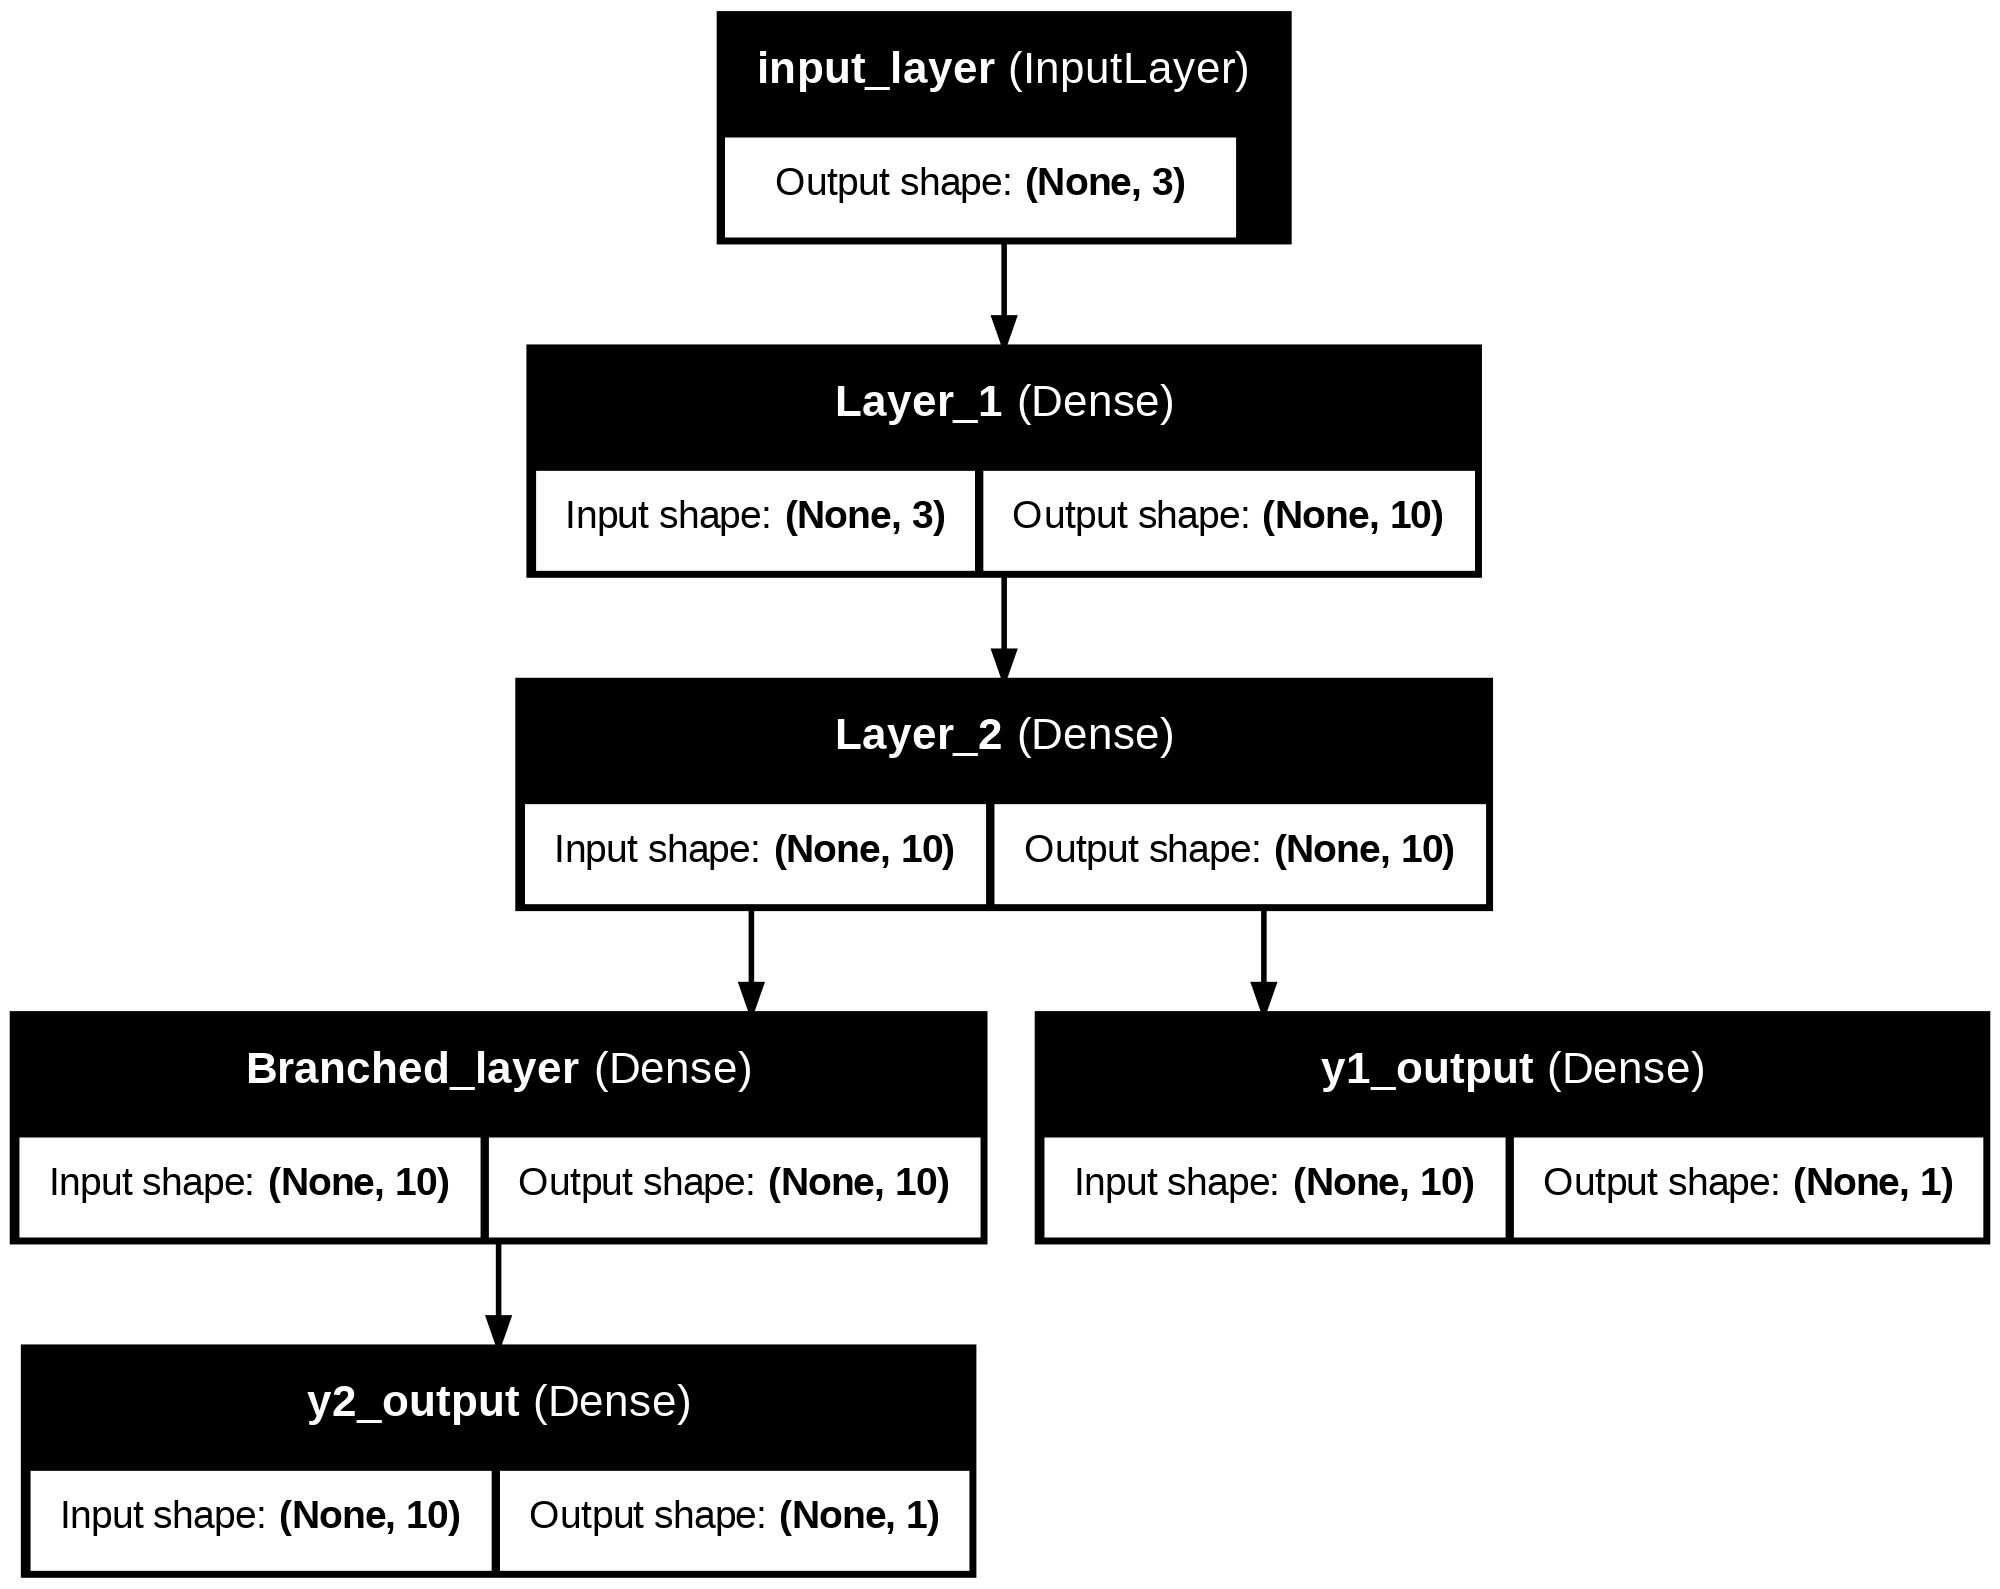

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True,show_layer_names=True)

In [23]:
#defining the optimiser and loss function

model.compile(optimizer='adam',

              loss={'y1_output':'mse','y2_output':'mse'})

In [24]:
##training the model
model.fit(X_train,y_train,epochs=1000, batch_size=128, validation_data=(X_test,y_test))

Epoch 1/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 209776.5938 - y1_output_loss: 206680.5312 - y2_output_loss: 3096.0654 - val_loss: 209478.0781 - val_y1_output_loss: 206440.7188 - val_y2_output_loss: 3038.6763
Epoch 2/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 209005.8438 - y1_output_loss: 205992.7031 - y2_output_loss: 3013.0322 - val_loss: 208217.7812 - val_y1_output_loss: 205461.4688 - val_y2_output_loss: 2757.5818
Epoch 3/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 207419.9531 - y1_output_loss: 204818.8906 - y2_output_loss: 2600.7896 - val_loss: 204601.6406 - val_y1_output_loss: 202745.3281 - val_y2_output_loss: 1857.4064
Epoch 4/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 203018.9844 - y1_output_loss: 201525.4531 - y2_output_loss: 1493.2434 - val_loss: 197429.5469 - val_y1_output_loss: 196986.7500 - val_y2_output_loss: 443.5638
Epoch 5/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 195228.1719 - y1_output_loss: 194946.6875 - y2_output_loss: 2

In [26]:
##model predictions

predictions = model.predict(X_test)

predicted_energy=predictions[0]

predicted_vacuum=predictions[1]

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [27]:
predictions

[array([[455.45157],
        [466.47052],
        [442.68008],
        ...,
        [476.13113],
        [424.71533],
        [462.88882]], dtype=float32),
 array([[50.65885 ],
        [41.72137 ],
        [60.959812],
        ...,
        [41.57544 ],
        [76.92702 ],
        [47.400547]], dtype=float32)]

In [33]:
y_test

(array([458.96, 463.29, 435.27, ..., 476.22, 440.29, 467.92]),
 array([44.63, 42.28, 70.32, ..., 38.38, 73.56, 44.58]))

Text(0, 0.5, 'predicted energy output')

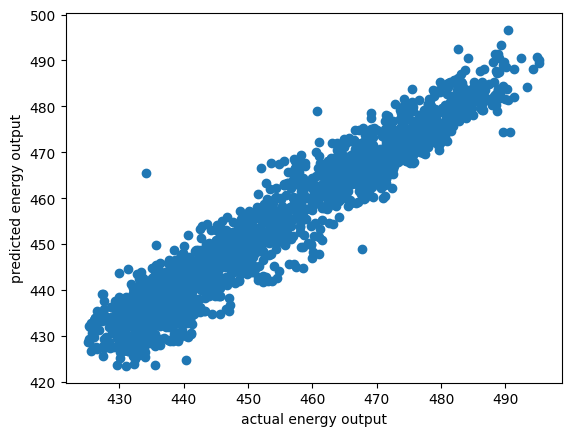

In [28]:
##Plotting actual vs predicted energy

plt.scatter(y_test[0],predicted_energy)

plt.xlabel('actual energy output')

plt.ylabel('predicted energy output')

Text(0, 0.5, 'predicted exhaust vacuum')

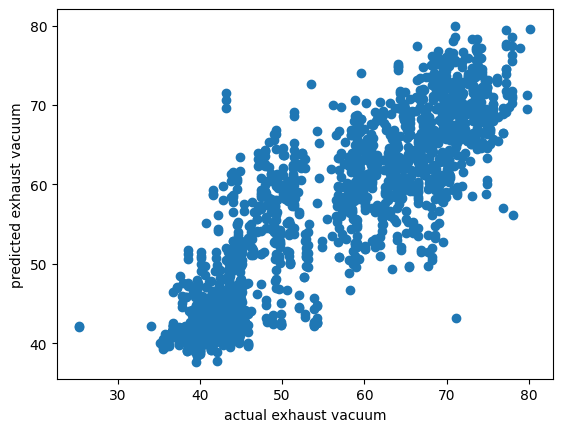

In [29]:
##Plotting actual vs predicted exhaust vacuum

plt.scatter(y_test[1],predicted_vacuum)

plt.xlabel('actual exhaust vacuum')

plt.ylabel('predicted exhaust vacuum')

In [31]:
from sklearn.metrics import r2_score

In [32]:
print('r2 score for energy predicted :',r2_score(y_test[0],predicted_energy))

print('r2 score forexhaust vacuum predicted :',r2_score(y_test[1],predicted_vacuum))

r2 score for energy predicted : 0.9259126683147183
r2 score forexhaust vacuum predicted : 0.7810857932094764
